## Assignment #2

This assignment has three parts. 

In the first part, you will implement Principle Components Analysis (from scratch) and use it to reduce the dimensionality of a dataset from 500 different measures, down to two.

In the second part, you will implement K-Means (from scratch) and use it to perform clustering on the dataset dividing the data into a series of clusters.


In the second part you will implement a mulitclass classification system to classify the data in the provided dataset into seven classes. 

### Mark-scheme
- Part 1 = 15 marks
- Part 2 = 35 marks
- Part 3 = 50 marks

-------------------------------------------------------------------------------------------------------------

## Part 1: Principle Components Analysis (PCA)
Here you will use the data provided in the "Dataset1.csv" file. 

Before clustering the data, you will implement PCA to reduce the dimensionality from 500 to 2. This way, we can see the results of the clustering on an easy to understand 2-dimensional graph.

#### 1.1 Load the Data
Populate the function below to load the data from the requested file.

In [2]:
# Load "Dataset1.csv" file
# Returns X where X is a 1000 by 500 (m=1000 and d=500. d is the number of features) 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import  StandardScaler
import numpy as np
from sklearn.decomposition import PCA


def load_data(file_name):
    # write your code here
    df = pd.read_csv(file_name, header= None)
    X = df.values
    return X

Loading the dataset as per your function.

In [3]:
# ## DO NOT MODIFY ##
# Instruction to load the dataset
X = load_data("Dataset1.csv")
X.shape

(1000, 500)

In [4]:
X

array([[  -8.07685105,  -33.58631331,  -15.27939065, ...,  -53.03864118,
         -52.27372462, -103.28334587],
       [   8.18304902,   29.53624089,   17.63493745, ...,   29.97305368,
         -17.66333809,  -30.66340756],
       [  73.24842558,   38.15551394,  -29.0677124 , ...,   22.28533633,
          11.00535524,   58.80431619],
       ...,
       [ 214.82153706,  167.47857262,  131.70816936, ...,   28.19523095,
         144.67934701,   58.34002358],
       [ 138.70589099,   87.86103572,   78.57609776, ...,  105.01206432,
         121.42299713,   60.42103821],
       [  98.96731216,  139.04293498,  135.10297224, ...,  100.80531263,
         105.32461786,  138.49508788]])

#### 1.2 Preprocess the data (5 marks)
Answer the following question:

**1.a)** Question: What pre-processing method will you use and why?

<font color='yellow'>Write your answer here:</font>

**answer:**
I use StandardScaler to preprocess the data. It makes each feature have a mean of 0 and a standard deviation of 1 by subtracting the mean and dividing by the standard deviation. This removes size differences between features, so PCA is not affected by different feature ranges. This improves the results of dimensionality reduction.

Populate the function below to perform any pre-processing needed to perform PCA (successfully).

In [5]:


def pre_process(X):
    # write your code here
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    return X

pre_process(X)

array([[-1.32636438, -1.80330253, -1.42918401, ..., -2.18158637,
        -2.18420991, -3.31491151],
       [-0.99670229, -0.50965843, -0.7624371 , ..., -0.51651914,
        -1.48740896, -1.79862065],
       [ 0.32246868, -0.33301361, -1.70849462, ..., -0.6707211 ,
        -0.9102304 ,  0.06944886],
       ...,
       [ 3.19279924,  2.31735461,  1.54834911, ..., -0.55217911,
         1.78098962,  0.05975451],
       [ 1.64958908,  0.6856596 ,  0.47205052, ...,  0.9886302 ,
         1.31277622,  0.10320571],
       [ 0.84390743,  1.73458993,  1.61711777, ...,  0.90425023,
         0.98867218,  1.73337742]])

#### 1.3 PCA Implementation (10 marks)
Implement PCA to reduce the dimensionality of the input matrix X from its original dimensions to 2.
- 10 marks for a correct manual implementation (you may use numpy functions - except PCA of course)
- 5 marks for a library call

In [6]:
# Perform Principle components analysis on X, returning a 2-dimension output
# input:  
# - X:    High dimensional dataset
# output: 
# - X_2d: Two dimensional dataset


def my_PCA(X):
    # write your code here
    X_mean = np.mean(X, axis= 0)
    X_c = X - X_mean

    cov_matrix = np.cov(X_c, rowvar=False)
   
    e_values, e_vectors = np.linalg.eigh(cov_matrix)

    sorted_indices = np.arange(len(e_values))[-2:][::-1]
    top_eigenvectors = e_vectors[:, sorted_indices]

    

    X_2d = np.dot(X_c, top_eigenvectors)


    # pca = PCA(n_components=2)
    # X_2d = pca.fit_transform(X)
    return X_2d    

(1000, 2)


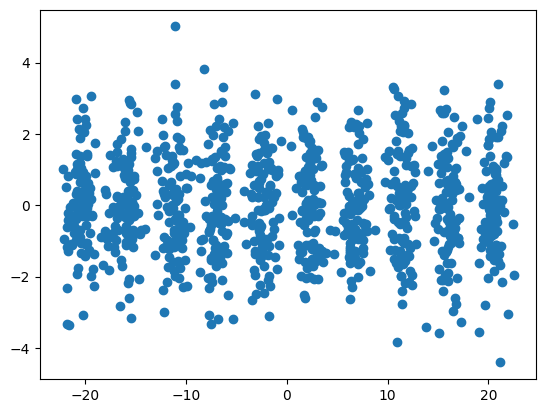

In [7]:
# ## DO NOT MODIFY ##
# Calling all of the created functions and plotting a 2D graph of the new 'data points'
X = pre_process(X)
X_2d = my_PCA(X)
# check out the shape and scatter plot the points


print(X_2d.shape)
plt.scatter(X_2d[:,0], X_2d[:,1])

## Part 2: K-means

#### 2.1 Initialisation (5 marks)
Implement a function which randomly initialises centroids. Please note, the data is one of the input variables for a reason.

In [8]:
# input:
# - k: number of centers
# - X: the data
# output:
# - centroids is a k by 2 
def initialise_centroids(X,k):    
    # Write your code here
    index = np.random.choice(X.shape[0],k,replace=False)
    centroids = X[index]
    return centroids

Code to call and display ten randomly created centroids. If you get ten rainbow dots, you are on the right track.

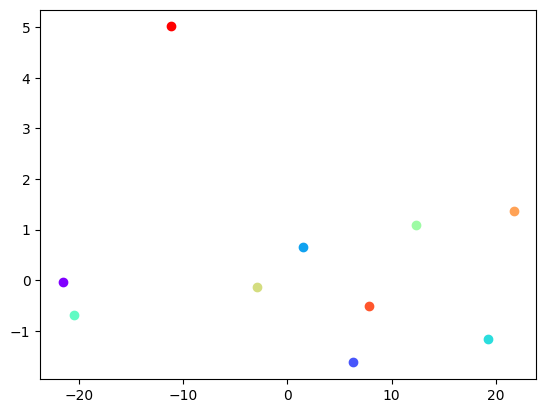

In [9]:
# ## DO NOT MODIFY ##
centroids = initialise_centroids(X_2d, 10)

# the code below will plot the centroids
colors = iter(plt.cm.rainbow(np.linspace(0, 1, len(centroids))))
for c in centroids:
    plt.scatter(c[0], c[1], color=next(colors))

#### 2.2 Assigning Points to Centroids (5 marks)
Implement a function that takes the matrix X and a set of centroids and assigns each point in X to one of the provided centroids.

In [10]:
from scipy.spatial.distance import cdist
# input:
# - X is a m by 2 point 
# - centroids is a k by 2 , the center of k clusters.
# output:
# - cluster_assignments is an m by 1 vector. the id of the cluster for each point in X
def assign(X,centroids):
    # Write your code here
    distances_matrix = cdist(X,centroids,metric= "euclidean")

    cluster_assignments = np.argmin(distances_matrix,axis=1)
    
    
    return cluster_assignments

Code to assign each of the points from the post-PCA data a relevant centroid.

(1000,)


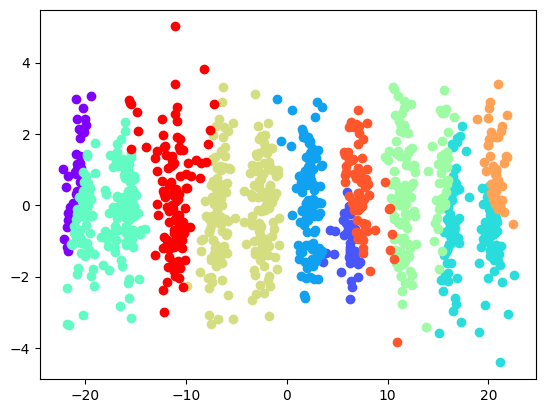

In [11]:
# ## DO NOT MODIFY ##
cluster_assignments = assign(X_2d, centroids)
print(cluster_assignments.shape)
# the code below will plot the points color-coded according to their cluster
colors = iter(plt.cm.rainbow(np.linspace(0, 1, len(centroids))))
for k in np.unique(cluster_assignments):
    plt.scatter(X_2d[cluster_assignments==k,0], X_2d[cluster_assignments==k,1], color=next(colors))

#### 2.3 K-Means Cost Function (5 marks)
Implement a function to compute the value of a cost function given a set of centroids and assignments 

In [12]:
# input:
# - X is a m by 2 point 
# - centroids is a k by 2 , the center of k clusters.
# - cluster_assignments is an m by 1 vector. the id of the cluster for each point in X
# output:
# - cost is the overall 'cost' of the current assignments

def cost(X, cluster_assignments, centroids):
    
    # Write your code here
    assigned_centroids = centroids[cluster_assignments]
    
    # print(assigned_centroids.shape)
    cost = ((X - assigned_centroids)**2).sum()
    return cost

Code (assuming 10 centroids) which assigns each cluster and generates the equivalent cost.

In [13]:
# ## DO NOT MODIFY
k=10
centroids = initialise_centroids(X_2d, k)
cluster_assignments = assign(X_2d, centroids)
c = cost(X_2d,cluster_assignments,centroids)
print(c)

7229.27886649372


#### 2.4 Putting it all together (20 marks)
Implement a function to perform the k-means algorithm using the functions you implemented above.

- 20 marks for a correct manual implementation (you may use numpy functions - except PCA of course)
- 5 marks for a library call

In [14]:
# input:
# - X is a m by 2 list of points 
# - k is the required number of centroids
# - num_of_iterations is the number of times the k-means algorithm will run before 'giving up'
# output:
# - cluster_assignments is a m x 1 for each point in X, which cluster it belongs to
# - centroids is a k x 2 matrix detailing the centroids of each cluster
def My_Kmeans(X,k,num_of_iterations):
    # Write your code here

    #Initialise centroids:
    centroids = initialise_centroids(X, k)

    for iteration in range(num_of_iterations):
        #Compute the nearest centroid for each point
        cluster_assignments = assign(X,centroids)

        #Compute new centroid
        new_centroids = []
        for i in range(k):
            if np.any(cluster_assignments == i):
                points_in_cluster = X[cluster_assignments == i] 
                centroid_i = points_in_cluster.mean(axis=0)
            else:
                centroid_i = centroids[i]

            new_centroids.append(centroid_i)

        new_centroids = np.array(new_centroids)

        #Determine convergence
        if np.allclose(new_centroids,centroids):
            break

    return cluster_assignments, centroids
 

Code to run and test the final algorithm with 10 clusters, 1000 iterations. If you get ten blobs each of which is a different colour, you are on the right track.

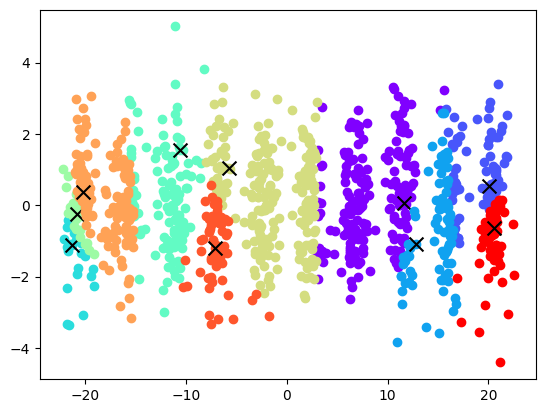

In [30]:
k = 10
centroids = []
cluster_assignments , centroids = My_Kmeans(X_2d,k,1000)

# the code below will plot the points color-coded according to their cluster
colors = iter(plt.cm.rainbow(np.linspace(0, 1, k)))
for k in np.unique(cluster_assignments):
    plt.scatter(X_2d[cluster_assignments==k,0], X_2d[cluster_assignments==k,1], color=next(colors))
    plt.scatter(centroids[k][0],centroids[k][1],marker="x",s=100,c='k')

Clustering according to the data's true clusters.

(1000, 1)


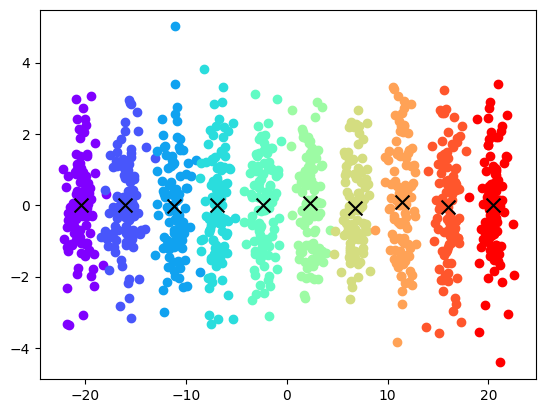

In [31]:
k = 10
cluster_assignments = load_data("True_clusters_IDs.csv")
print(cluster_assignments.shape)

centroids = []
for idx in range(k):            
    temp_cent = X_2d[cluster_assignments.ravel()==idx].mean(axis=0)             
    centroids.append(temp_cent)
            
# the code below will plot the points color-coded according to their cluster
colors = iter(plt.cm.rainbow(np.linspace(0, 1, k)))
for k in range(k):
    plt.scatter(X_2d[cluster_assignments.ravel()==k,0], X_2d[cluster_assignments.ravel()==k,1], color=next(colors))
    plt.scatter(centroids[k][0],centroids[k][1],marker="x",s=100,c='k')

# Part 3 (50 Marks)

You will use the data provided in the **"Dataset2.xlxs"** file in Part 3 of the assignment. The dataset consists of 13611 samples belonging to seven different classes. Each sample has 16 features. 

* Objective: Using the provided dataset, develop a seven class classification method.

* Evaluation Criteria: Your points will be based on the final **average accuracy** achieved by your method in a **10-fold cross validation** framework.

    * 25 marks for achieving a classification accuracy above 82% and upto 87.92%         
    * 40 marks for achieving a classification accuracy above 87.92% and up to 90.0%  
    * 45 marks for achieving a classification accuracy above 90.0% and upto 93.13% 
    * 50 marks for achieving a classification accuracy above 93.13%.     

* You have the freedom to employ any pre-processing, classifiers, and 
post-processing pipeline that you find applicable. Feel free to experiment with 
a wide range of machine learning methods to improve the performance of your system. 

* Your claims and results must be reproducable. 

* To ensure the reproducibility of your results and claims, it is essential that you save both your trained models, hyperparameter specifications,  and the random seeds used throughout your experiments. Saving your models will allow reproducing the achieved accuracy, and recording the random seeds will help validate any randomness in your processes.

In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.combine import SMOTETomek
from sklearn.metrics import accuracy_score
import joblib
import json

## RandomForest

In [ ]:
# Set up the randomseed
np.random.seed(42)
random.seed(42)


# Load the dataset
df = pd.read_excel("Dataset2.xlsx", header=None)
column_names = [f"feature{i}" for i in range(1, 17)] + ["Label"]
df.columns = column_names

# apply feature engineering 
features = df.columns[:-1] 

df["feature_sum"] = df[features].sum(axis=1)
df["feature_mean"] = df[features].mean(axis=1)
df["feature_std"] = df[features].std(axis=1)
df["feature_max"] = df[features].max(axis=1)
df["feature_min"] = df[features].min(axis=1)

print(df.head())
print()


# Separate features and labels
X = df.drop(columns=['Label'])
y = df["Label"]


# Check for missing values
print(df.isnull().sum())
print()


# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Data balancing with SMOTETomek

smt = SMOTETomek(random_state=42)
X_resampled, y_resampled = smt.fit_resample(X_train, y_train)


# Feature standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)


# PCA (no dimension reduction)
pca = PCA(n_components=None, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Before PCA: {X.shape}, After PCA: {X_train_pca.shape}")


# RandomForest training
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

randomforest_params = {
    "n_estimators": [200, 300, 500],              
    "max_depth": [10, 20, 30, None],               
    "min_samples_split": [2, 5, 10],               
    "min_samples_leaf": [1, 2, 4],                 
    "max_features": ['sqrt', 'log2', None],        
    "bootstrap": [True, False],                    
    "criterion": ["gini", "entropy"],
}

randomforest_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    randomforest_params,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1
)

randomforest_grid.fit(X_train_pca, y_resampled)
randomforest_best = randomforest_grid.best_estimator_

rf_scores = cross_val_score(
    randomforest_best,
    X_train_pca,
    y_resampled,
    cv=cv,
    scoring="accuracy",
    n_jobs=-1
)

rf_mean_accuracy = np.mean(rf_scores)

print(f"RandomForest Best Hyperparameters: {randomforest_grid.best_params_}")
print(f"RandomForest 10-Fold Cross-Validation Mean Accuracy: {rf_mean_accuracy:.4f}")


# Save the model
joblib.dump(randomforest_best, "RandomForest_Model.pkl")

randomforest_hyperparameters = {
    "random_seed": 42,
    "RandomForest": randomforest_best.get_params()
}

with open("Model_Hyperparameters.json", "w") as f:
    json.dump(randomforest_hyperparameters, f)


# Predict on test set
loaded_rf = joblib.load("RandomForest_Model.pkl")
y_pred = loaded_rf.predict(X_test_pca)
print("Test Accuracy:", accuracy_score(y_test, y_pred))


   feature1  feature2    feature3    feature4  feature5  feature6  feature7  \
0     28395   610.291  208.178117  173.888747  1.197191  0.549812     28715   
1     28734   638.018  200.524796  182.734419  1.097356  0.411785     29172   
2     29380   624.110  212.826130  175.931143  1.209713  0.562727     29690   
3     30008   645.884  210.557999  182.516516  1.153638  0.498616     30724   
4     30140   620.134  201.847882  190.279279  1.060798  0.333680     30417   

     feature8  feature9  feature10  ...  feature13  feature14  feature15  \
0  190.141097  0.763923   0.988856  ...   0.007332   0.003147   0.834222   
1  191.272750  0.783968   0.984986  ...   0.006979   0.003564   0.909851   
2  193.410904  0.778113   0.989559  ...   0.007244   0.003048   0.825871   
3  195.467062  0.782681   0.976696  ...   0.007017   0.003215   0.861794   
4  195.896503  0.773098   0.990893  ...   0.006697   0.003665   0.941900   

   feature16  Label   feature_sum  feature_mean   feature_std  featu